In [554]:
""" Chargement du fichier source """

%reload_ext autoreload
%autoreload 2
from csorca import *
import matplotlib.pyplot as plt

In [555]:
d = 5.
tau = 120.
time_step = 3.
area_size = 500.

position1 = np.array([0., 0.])
destination1 = np.array([area_size, area_size])
heading1 = (destination1 - position1)/np.linalg.norm((position1 - destination1))


position2 = np.array([area_size, 0.])
destination2 = np.array([0., area_size])
heading2 = (destination2 - position2)/np.linalg.norm((position2 - destination2))

ac1 = Aircraft(position1, heading1, destination1)
ac2 = Aircraft(position2, heading2, destination2)

In [556]:
aircrafts = [ac1, ac2]
sim1 = Simulation(aircrafts, d, tau)

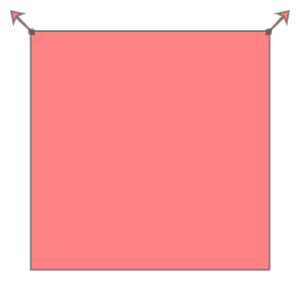

10.617724895477295


In [557]:
start = time.time()
sim1.run()
print(time.time() - start)

In [558]:
print(sim1.separation_losses)

0


In [561]:
%matplotlib

plt.figure(figsize=(12,8))
plt.scatter([x[0] for x in sim1.aircraft[0].trajectory], [x[1] for x in sim1.aircraft[0].trajectory], s=7, c='blue')
plt.scatter([x[0] for x in sim1.aircraft[1].trajectory], [x[1] for x in sim1.aircraft[1].trajectory], s=7, c='green')

sep_losses_x_1 = [point1[0] for point1, point2 in zip(sim1.aircraft[0].trajectory, sim1.aircraft[1].trajectory) if np.linalg.norm(point1 - point2) < d]
sep_losses_y_1 = [point1[1] for point1, point2 in zip(sim1.aircraft[0].trajectory, sim1.aircraft[1].trajectory) if np.linalg.norm(point1 - point2) < d]
plt.scatter(sep_losses_x_1, sep_losses_y_1, s=40, c='red', alpha=0.2)

sep_losses_x_2 = [point2[0] for point1, point2 in zip(sim1.aircraft[0].trajectory, sim1.aircraft[1].trajectory) if np.linalg.norm(point1 - point2) < d]
sep_losses_y_2 = [point2[1] for point1, point2 in zip(sim1.aircraft[0].trajectory, sim1.aircraft[1].trajectory) if np.linalg.norm(point1 - point2) < d]
plt.scatter(sep_losses_x_2, sep_losses_y_2, s=40, c='red', alpha=0.2)

plt.xlim(0,500)
plt.ylim(0,500)
plt.show()


Using matplotlib backend: Qt5Agg


In [571]:
sim1.aircraft[0].trajectory[77]

array([163.34166645, 163.34166645])

In [570]:
sim1.aircraft[1].trajectory[77]

array([336.65833355, 163.34166645])